1. Using scipy to import channel data into python

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mat16A = scipy.io.loadmat('./data/2017.10.18_16.58.07_1.A.mat')
mat16B = scipy.io.loadmat('./data/2017.10.18_16.58.07_1.B.mat')
mat17A = scipy.io.loadmat('./data/2017.10.18_17.10.19_1.A.mat')
mat17B = scipy.io.loadmat('./data/2017.10.18_17.10.19_1.B.mat')

mat16A.items()

dict_items([('T1', array([[0.0000000e+00, 2.0000000e-07, 4.0000000e-07, ..., 3.3554426e+00,
        3.3554428e+00, 3.3554430e+00]])), ('Y1', array([[7988, 7994, 7952, ..., 7986, 7998, 7960]], dtype=uint16))])

# 1. Zero Noise threshold of Data

In [4]:
mat16A['T1'].shape

(1, 16777216)

In [5]:
x1 = mat16A['T1'][0,:]
y1 = mat16A['Y1'][0,:]

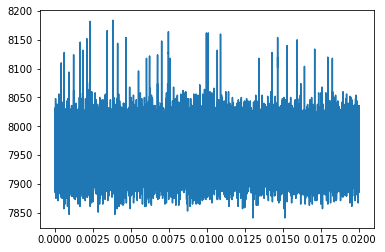

In [6]:
plt.plot(x1[:100000],y1[:100000])
plt.show()

We assume the noise threshold is 8150, if you decrease this, you'll see a sharp peak in the histogram in the next cell

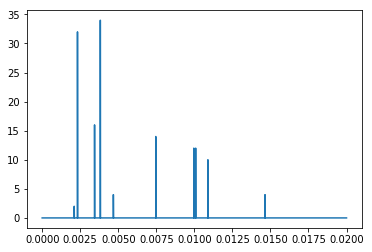

In [7]:
from scipy import stats
#we are assuming the noise threshold is at 8150
yt = np.clip(y1, a_min=8150,a_max=None)
yt -= 8150
#decrese everything by noise threshold, clip to 0

plt.plot(x1[:100000],yt[:100000])
plt.show()

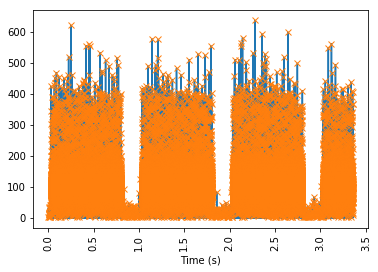

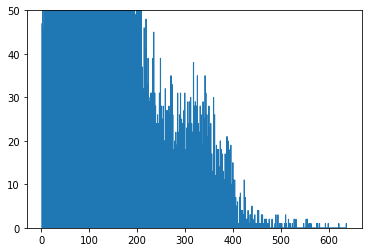

In [10]:
from scipy.signal import find_peaks

peaksA, _ = find_peaks(yt, height=0,distance=15) #peaks are the x indices

# plot graph with detected peaks over it, convert to us
plt.plot(x1,yt)
plt.plot(x1[peaksA], yt[peaksA], "x")

#formatting
plt.xticks(rotation='vertical')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Time (s)")
plt.show()


plt.hist(yt[peaksA], bins=1500, log=False,histtype='step')
plt.ylim(0,50)
plt.show()

We can set the regime of one photon as from 0-250, 2 photos as 250-500 and 3 photons as 500-750. Eventually might want more sophisticated analysis

In [11]:
x2 = mat16B['T1'][0,:]
y2 = mat16B['Y1'][0,:]

#plt.plot(x2[:100000],y2[:100000])
#plt.show()

In [12]:
from scipy import stats
#we are assuming the noise threshold is at 8150
ytB = np.clip(y2, a_min=8150,a_max=None)
ytB -= 8150
#decrese everything by noise threshold, clip to 0

#plt.plot(x2[:100000],ytB[:100000])
#plt.show()

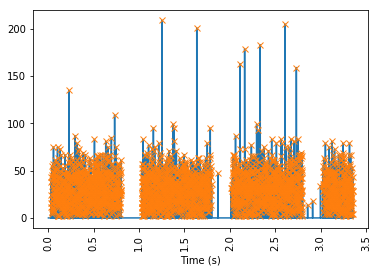

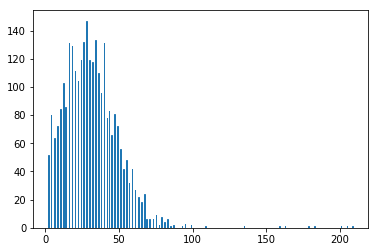

In [13]:
from scipy.signal import find_peaks

peaksB, _ = find_peaks(ytB, height=0,distance=15) #peaks are the x indices

# plot graph with detected peaks over it
plt.plot(x2,ytB)
plt.plot(x2[peaksB], ytB[peaksB], "x")

#formatting
plt.xticks(rotation='vertical')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel("Time (s)")
plt.show()


plt.hist(ytB[peaksB], bins=500, log=False,histtype='step')
#plt.ylim(0,25)
plt.show()

# 2. Let's try to calculate the Heralding Ratio

Heralding Ratio = coincidences/total peaks for all photon amounts

In [14]:
#would want to use a set data structure for B for faster run-time
def peakInRange(peakI, peaksB,rng):
    for i in range(-rng,rng+1):
        if (peakI+i in peaksB):
            return True
    return False
        
def findRatioInRange(rng):
    coincidences= 0
    for peakI in peaksB:
        if peakInRange(peakI,peaksA,rng):
            coincidences+=1
    return coincidences/peaksB.shape[0]

#heralding ratios for different windows
for i in range (0,20):
    print("window: "+ str(i), " ratio: " + str(findRatioInRange(i)))

window: 0  ratio: 0.14146680570038234
window: 1  ratio: 0.3510601320820299
window: 2  ratio: 0.4741049704553354
window: 3  ratio: 0.5575251998609663
window: 4  ratio: 0.5992353145637818
window: 5  ratio: 0.6152241918665277
window: 6  ratio: 0.6239137990962809
window: 7  ratio: 0.6305179005908933
window: 8  ratio: 0.6371220020855057
window: 9  ratio: 0.6437261035801182
window: 10  ratio: 0.6499826207855405
window: 11  ratio: 0.654153632255822
window: 12  ratio: 0.6590198123044838
window: 13  ratio: 0.6611053180396246
window: 14  ratio: 0.6645811609315259
window: 15  ratio: 0.670490093847758
window: 16  ratio: 0.6746611053180396
window: 17  ratio: 0.6774417796315606
window: 18  ratio: 0.681265206812652
window: 19  ratio: 0.6826555439694126


(56694,)